In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [25]:
data = pd.read_csv('/content/sugarcane_updated10k.csv')
data.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Sugarcane,Monsoon,Dhaka,31318.0,1287451,2051.4000,2980534.06,9708.58,41.896957
1,Sugarcane,Whole Year,Chittagong,308857.0,28999269,1266.7000,29393920.69,95745.67,91.747368
2,Sugarcane,Whole Year,Rajshahi,82.0,225,3818.2000,7803.94,25.42,2.352000
3,Sugarcane,Whole Year,Barisal,25797.0,1818700,1852.9000,2455100.49,7997.07,67.836250
4,Sugarcane,Monsoon,Sylhet,2710.0,232369,1434.5875,267748.00,785.90,82.595000


In [3]:
data.to_csv('/content/rice.csv', index=False)

In [26]:
data.shape

(10000, 9)

In [27]:
data.isnull().sum()

Crop               0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [28]:
data.select_dtypes('number').columns

Index(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide',
       'Yield'],
      dtype='object')

In [29]:
categorical = data.select_dtypes(exclude='number').columns
numerical = data.select_dtypes('number').columns

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data.drop(['Yield'], axis=1)
y = data.Yield
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
transform = [('OHE', OneHotEncoder(), ['Crop', 'Season', 'State']),
 ('MMS', MinMaxScaler(), ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide'])]
ct = ColumnTransformer(transform)


pro_X_train = ct.fit_transform(X_train)
pro_X_test = ct.transform(X_test)

In [32]:
!pip install xgboost
!pip install catboost

In [33]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Your data preparation steps here (pro_X_train, y_train, pro_X_test, y_test)

# Define a list of models
models = [
    #('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),

    #('Support Vector Machine', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('AdaBoost', AdaBoostRegressor())
]

# Define hyperparameters and their possible values for each model
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Support Vector Machine': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Create lists to store the metrics and models
model_names = []
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
trained_models = {}

# Create a dictionary to store best hyperparameters
best_params_dict = {}

# Iterate over models and perform grid search
for model_name, model in models:
    print(f"\nPerforming Grid Search for {model_name}...")

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=5)

    # Fit the model to the training data
    grid_search.fit(pro_X_train, y_train)

    # Print the best parameters and corresponding score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Save the best model
    model_filename = f"{model_name}_model.joblib"
    joblib.dump(best_model, model_filename)
    trained_models[model_name] = model_filename

    # Save the best hyperparameters
    best_params_dict[model_name] = grid_search.best_params_

    # Evaluate the model on the test set
    test_predictions = best_model.predict(pro_X_test)

    # Calculate metrics
    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)

    # Print metrics
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Store metrics in lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Print the best hyperparameters
print("\nBest hyperparameters:")
for model_name, params in best_params_dict.items():
    print(f"{model_name}: {params}")


Streaming output truncated to the last 5000 lines.
23:	learn: 10.6894323	total: 83.1ms	remaining: 90ms
24:	learn: 10.4180755	total: 86.2ms	remaining: 86.2ms
25:	learn: 10.1280634	total: 89.6ms	remaining: 82.7ms
26:	learn: 9.9581737	total: 93ms	remaining: 79.3ms
27:	learn: 9.7861309	total: 96.4ms	remaining: 75.7ms
28:	learn: 9.5630057	total: 99.8ms	remaining: 72.3ms
29:	learn: 9.4050217	total: 103ms	remaining: 68.7ms
30:	learn: 9.1666420	total: 106ms	remaining: 65.2ms
31:	learn: 8.9917648	total: 110ms	remaining: 61.7ms
32:	learn: 8.7662052	total: 113ms	remaining: 58.3ms
33:	learn: 8.6187474	total: 117ms	remaining: 54.9ms
34:	learn: 8.4535603	total: 120ms	remaining: 51.4ms
35:	learn: 8.3061730	total: 124ms	remaining: 48.1ms
36:	learn: 8.0968218	total: 128ms	remaining: 45ms
37:	learn: 7.9215648	total: 132ms	remaining: 41.6ms
38:	learn: 7.8114206	total: 135ms	remaining: 38ms
39:	learn: 7.6856965	total: 141ms	remaining: 35.3ms
40:	learn: 7.5840053	total: 145ms	remaining: 31.9ms
41:	learn: 7

In [34]:
# Display only model names and their results
for name, r2, mae, mse, rmse in zip(model_names, r2_scores, mae_scores, mse_scores, rmse_scores):
    print(f"\nModel: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")



Model: Decision Tree
R-squared (R²): 0.9943713996877477
Mean Absolute Error (MAE): 0.3762007733781512
Mean Squared Error (MSE): 5.3272665958465035
Root Mean Squared Error (RMSE): 2.308087215823203

Model: K-Nearest Neighbors
R-squared (R²): 0.9840190155091725
Mean Absolute Error (MAE): 0.8799600910908418
Mean Squared Error (MSE): 15.125423750804337
Root Mean Squared Error (RMSE): 3.889141775611213

Model: Random Forest
R-squared (R²): 0.995946147033508
Mean Absolute Error (MAE): 0.3719766792949116
Mean Squared Error (MSE): 3.836825195396383
Root Mean Squared Error (RMSE): 1.958781558876942

Model: Gradient Boosting
R-squared (R²): 0.996736042486263
Mean Absolute Error (MAE): 0.4252356159943654
Mean Squared Error (MSE): 3.0892177217386005
Root Mean Squared Error (RMSE): 1.7576170577627541

Model: XGBoost
R-squared (R²): 0.9961662814414126
Mean Absolute Error (MAE): 0.5300243559883455
Mean Squared Error (MSE): 3.628475941093535
Root Mean Squared Error (RMSE): 1.9048558845995502

Model: 

In [37]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
import joblib
import numpy as np

# Load individual models
xg_model = joblib.load("/content/XGBoost_model.joblib")
cb_model = joblib.load("/content/CatBoost_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")

# Load your test data (replace this line with your actual test data loading)
# pro_X_test = ...

# Fit individual models if not already fitted
xg_model.fit(pro_X_train, y_train)
cb_model.fit(pro_X_train, y_train)
gb_model.fit(pro_X_train, y_train)

models = {'Xg': xg_model, 'Catboost': cb_model, 'Gradient Boosting': gb_model}

ensemble_models = [
    ('Voting', VotingRegressor(estimators=[('XGB', xg_model), ('cb', cb_model), ('gb', gb_model)])),
    ('Stacking', StackingRegressor(estimators=[('XGB', xg_model), ('cb', cb_model), ('gb', gb_model)],
                                   final_estimator=LinearRegression())),
    #('Bagging', BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10))
]

# Create lists to store the metrics
ensemble_names = []
ensemble_r2_scores = []
ensemble_mae_scores = []
ensemble_mse_scores = []
ensemble_rmse_scores = []
ensemble_models_saved = []

# Evaluate ensemble models
for ensemble_name, ensemble_model in ensemble_models:
    print(f"\nEvaluating {ensemble_name}...")

    # Fit the ensemble model
    ensemble_model.fit(pro_X_train, y_train)

    # Predict on the test set using the ensemble model
    ensemble_predictions = ensemble_model.predict(pro_X_test)

    # Calculate metrics
    ensemble_r2 = r2_score(y_test, ensemble_predictions)
    ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
    ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
    ensemble_rmse = np.sqrt(ensemble_mse)

    # Print metrics
    print(f"R-squared (R²) for {ensemble_name}: {ensemble_r2}")
    print(f"Mean Absolute Error (MAE) for {ensemble_name}: {ensemble_mae}")
    print(f"Mean Squared Error (MSE) for {ensemble_name}: {ensemble_mse}")
    print(f"Root Mean Squared Error (RMSE) for {ensemble_name}: {ensemble_rmse}")

    # Store metrics in lists
    ensemble_names.append(ensemble_name)
    ensemble_r2_scores.append(ensemble_r2)
    ensemble_mae_scores.append(ensemble_mae)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_rmse_scores.append(ensemble_rmse)

    # Save the fitted ensemble model
    model_filename = f"{ensemble_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(ensemble_model, model_filename)
    ensemble_models_saved.append(model_filename)

# Display only ensemble model names and their results
for name, r2, mae, mse, rmse in zip(ensemble_names, ensemble_r2_scores, ensemble_mae_scores, ensemble_mse_scores, ensemble_rmse_scores):
    print(f"\nEnsemble Model: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nEnsemble Models Saved:")
for filename in ensemble_models_saved:
    print(filename)


0:	learn: 26.9871308	total: 4.11ms	remaining: 818ms
1:	learn: 23.3262554	total: 7.84ms	remaining: 776ms
2:	learn: 20.7143701	total: 11.2ms	remaining: 733ms
3:	learn: 18.3977180	total: 14.3ms	remaining: 700ms
4:	learn: 16.6811122	total: 17.6ms	remaining: 687ms
5:	learn: 15.4036898	total: 20.9ms	remaining: 675ms
6:	learn: 14.1436845	total: 24.3ms	remaining: 671ms
7:	learn: 13.3136129	total: 27.8ms	remaining: 668ms
8:	learn: 12.4020910	total: 31.3ms	remaining: 665ms
9:	learn: 11.8206715	total: 34.8ms	remaining: 662ms
10:	learn: 11.0513114	total: 38.3ms	remaining: 658ms
11:	learn: 10.3525352	total: 41.7ms	remaining: 653ms
12:	learn: 9.9284843	total: 45.5ms	remaining: 655ms
13:	learn: 9.4450085	total: 49.1ms	remaining: 652ms
14:	learn: 9.0724871	total: 52.5ms	remaining: 648ms
15:	learn: 8.6217881	total: 56.2ms	remaining: 646ms
16:	learn: 8.3319889	total: 59.6ms	remaining: 642ms
17:	learn: 7.9347296	total: 63.2ms	remaining: 639ms
18:	learn: 7.6158008	total: 66.8ms	remaining: 636ms
19:	learn:

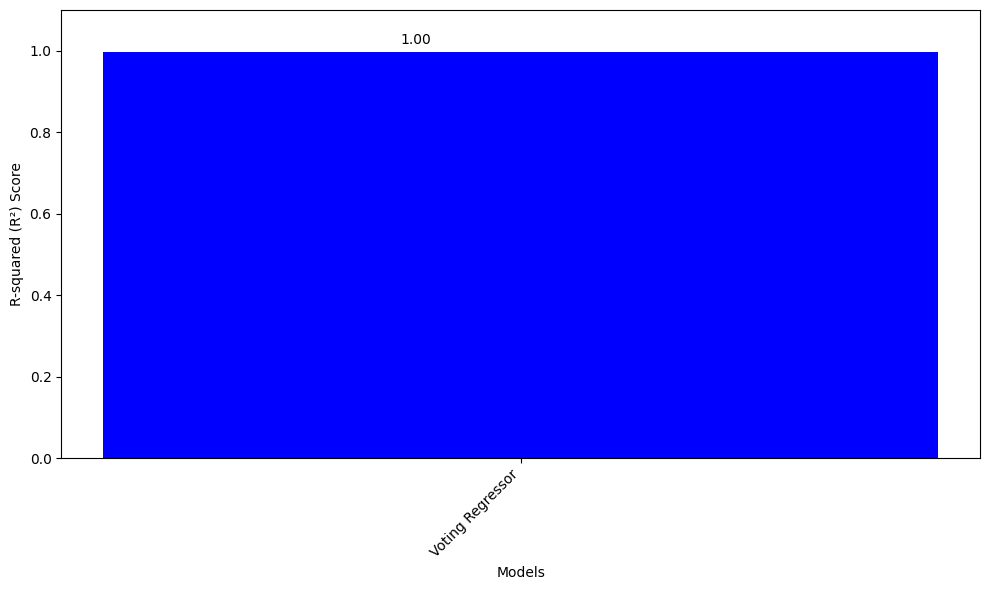

In [38]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Load the saved models

tree_model = joblib.load("/content/voting_model.pkl")
# knn_model = joblib.load("/content/stacking_model.pkl")
# rf_model = joblib.load("/content/Random Forest_model.joblib")
# gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
# ada_model = joblib.load("/content/AdaBoost_model.joblib")
# cat_model = joblib.load("/content/CatBoost_model.joblib")
# linear_model = joblib.load("/content/Linear Regression_model.joblib")
# svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
# xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    # 'K-Nearest Neighbors': knn_model,
    # 'Random Forest': rf_model,
    # 'Gradient Boosting': gb_model,
    # 'AdaBoost': ada_model,
    # 'CatBoost': cat_model,
    # 'Linear Regression': linear_model,
    # 'Support Vector Machine': svm_model,
    # 'XGBoost': xgb_model,
    'Voting Regressor': tree_model,
}

# Evaluate and store R-squared scores for each model
r2_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    r2 = r2_score(y_test, test_predictions)
    r2_scores.append(r2)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('R-squared (R²) Score')
# plt.title('R-squared Scores for Different Models')
plt.ylim(0, 1.1)  # Set the y-axis limit based on your R-squared range (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add R-squared values on top of the bars
for bar, r2_score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{r2_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


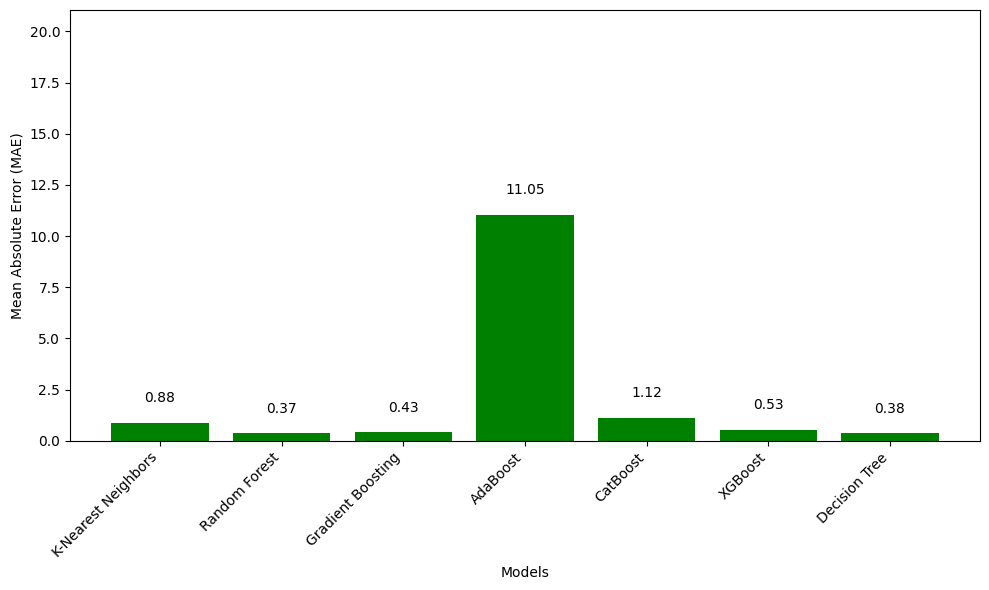

In [39]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# Load the saved models

tree_model = joblib.load("/content/Decision Tree_model.joblib")
knn_model = joblib.load("/content/K-Nearest Neighbors_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
ada_model = joblib.load("/content/AdaBoost_model.joblib")
cat_model = joblib.load("/content/CatBoost_model.joblib")

#linear_model = joblib.load("/content/Linear Regression_model.joblib")
#svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store MAE scores for each model
mae_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mae = mean_absolute_error(y_test, test_predictions)
    mae_scores.append(mae)

# Create a bar chart for MAE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.ylim(0, max(mae_scores) + 10)  # Set the y-axis limit
plt.xticks(rotation=45, ha='right')
# plt.title('Mean Absolute Error (MAE) for Different Models')

# Add MAE values on top of the bars with improved placement
for bar, mae_score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{mae_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


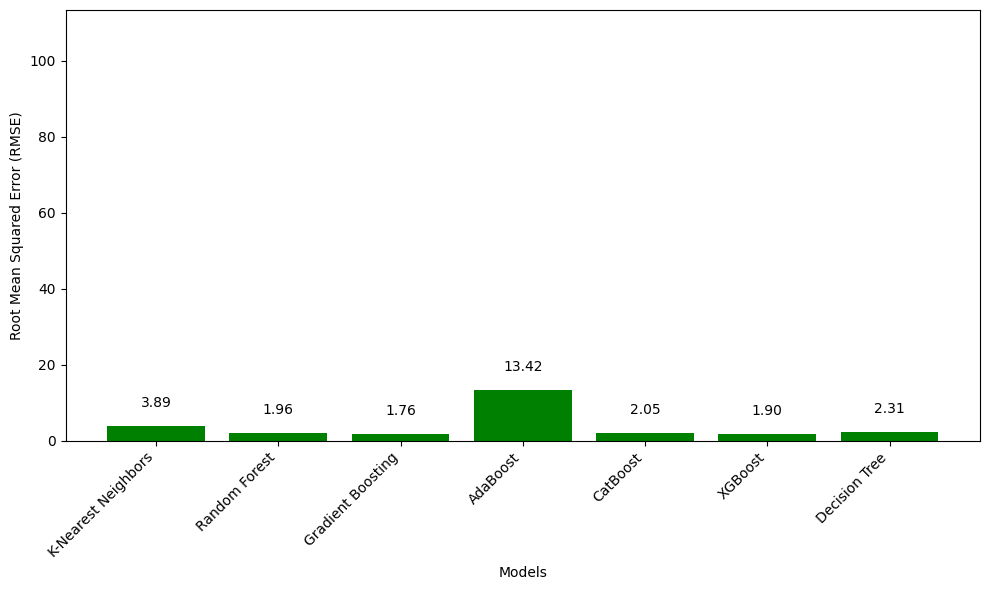

In [40]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/Decision Tree_model.joblib")
knn_model = joblib.load("/content/K-Nearest Neighbors_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
ada_model = joblib.load("/content/AdaBoost_model.joblib")
cat_model = joblib.load("/content/CatBoost_model.joblib")
#linear_model = joblib.load("/content/Linear Regression_model.joblib")
#svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

# Create a bar chart for RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_scores) + 100)  # Set the y-axis limit
plt.xticks(rotation=45, ha='right')

# Add RMSE values on top of the bars with improved placement
for bar, rmse_score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{rmse_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [41]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import joblib
import numpy as np

# Load individual models
cb_model = joblib.load("/content/CatBoost_model.joblib")
xg_model = joblib.load("/content/XGBoost_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")

# Load your test data (replace this line with your actual test data loading)
# pro_X_test = ...

# Fit individual models if not already fitted
cb_model.fit(pro_X_train, y_train)
xg_model.fit(pro_X_train, y_train)
gb_model.fit(pro_X_train, y_train)

models = {'XGB': xg_model, 'Catboost': cb_model, 'Gradient Boosting': gb_model}

final_estimators = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('AdaBoost', AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=50, learning_rate=1.0)),
    ('Gradient Boosting', GradientBoostingRegressor()),
   # ('SVR', SVR(kernel='linear')),
    ('KNN', KNeighborsRegressor()),
    ('CatBoost', CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE')),
    #('Linear Regression', LinearRegression()),
    ('Gradient Boosting Base', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor())
]

# Create lists to store the metrics
ensemble_names = []
ensemble_r2_scores = []
ensemble_mae_scores = []
ensemble_mse_scores = []
ensemble_rmse_scores = []
ensemble_models_saved = []

# Evaluate ensemble models with different final estimators
for final_name, final_estimator in final_estimators:
    stacking_model = StackingRegressor(
        estimators=[('xg', xg_model), ('cb', cb_model), ('gb', gb_model)],
        final_estimator=final_estimator
    )

    ensemble_name = f'Stacking with {final_name} as Final Estimator'

    print(f"\nEvaluating {ensemble_name}...")

    # Fit the ensemble model
    stacking_model.fit(pro_X_train, y_train)

    # Predict on the test set using the ensemble model
    ensemble_predictions = stacking_model.predict(pro_X_test)

    # Calculate metrics
    ensemble_r2 = r2_score(y_test, ensemble_predictions)
    ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
    ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
    ensemble_rmse = np.sqrt(ensemble_mse)

    # Print metrics
    print(f"R-squared (R²) for {ensemble_name}: {ensemble_r2}")
    print(f"Mean Absolute Error (MAE) for {ensemble_name}: {ensemble_mae}")
    print(f"Mean Squared Error (MSE) for {ensemble_name}: {ensemble_mse}")
    print(f"Root Mean Squared Error (RMSE) for {ensemble_name}: {ensemble_rmse}")

    # Store metrics in lists
    ensemble_names.append(ensemble_name)
    ensemble_r2_scores.append(ensemble_r2)
    ensemble_mae_scores.append(ensemble_mae)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_rmse_scores.append(ensemble_rmse)

    # Save the fitted ensemble model
    model_filename = f"{ensemble_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(stacking_model, model_filename)
    ensemble_models_saved.append(model_filename)

# Display only ensemble model names and their results
for name, r2, mae, mse, rmse in zip(ensemble_names, ensemble_r2_scores, ensemble_mae_scores, ensemble_mse_scores, ensemble_rmse_scores):
    print(f"\nEnsemble Model: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nEnsemble Models Saved:")
for filename in ensemble_models_saved:
    print(filename)


0:	learn: 26.9871308	total: 3.43ms	remaining: 682ms
1:	learn: 23.3262554	total: 7.09ms	remaining: 702ms
2:	learn: 20.7143701	total: 10.3ms	remaining: 678ms
3:	learn: 18.3977180	total: 13.7ms	remaining: 671ms
4:	learn: 16.6811122	total: 17.1ms	remaining: 665ms
5:	learn: 15.4036898	total: 20.4ms	remaining: 660ms
6:	learn: 14.1436845	total: 23.8ms	remaining: 655ms
7:	learn: 13.3136129	total: 27ms	remaining: 647ms
8:	learn: 12.4020910	total: 30.3ms	remaining: 644ms
9:	learn: 11.8206715	total: 33.9ms	remaining: 644ms
10:	learn: 11.0513114	total: 37.3ms	remaining: 641ms
11:	learn: 10.3525352	total: 40.7ms	remaining: 637ms
12:	learn: 9.9284843	total: 44ms	remaining: 632ms
13:	learn: 9.4450085	total: 47.3ms	remaining: 628ms
14:	learn: 9.0724871	total: 50.8ms	remaining: 627ms
15:	learn: 8.6217881	total: 54.2ms	remaining: 624ms
16:	learn: 8.3319889	total: 57.6ms	remaining: 620ms
17:	learn: 7.9347296	total: 61ms	remaining: 616ms
18:	learn: 7.6158008	total: 64.2ms	remaining: 612ms
19:	learn: 7.354

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
179:	learn: 1.6254497	total: 638ms	remaining: 70.8ms
180:	learn: 1.6165718	total: 642ms	remaining: 67.4ms
181:	learn: 1.5984527	total: 645ms	remaining: 63.8ms
182:	learn: 1.5912986	total: 648ms	remaining: 60.2ms
183:	learn: 1.5776890	total: 651ms	remaining: 56.6ms
184:	learn: 1.5679411	total: 654ms	remaining: 53.1ms
185:	learn: 1.5627973	total: 658ms	remaining: 49.5ms
186:	learn: 1.5595414	total: 661ms	remaining: 45.9ms
187:	learn: 1.5532298	total: 664ms	remaining: 42.4ms
188:	learn: 1.5489015	total: 667ms	remaining: 38.8ms
189:	learn: 1.5420077	total: 670ms	remaining: 35.3ms
190:	learn: 1.5325968	total: 673ms	remaining: 31.7ms
191:	learn: 1.5277662	total: 677ms	remaining: 28.2ms
192:	learn: 1.5251873	total: 680ms	remaining: 24.7ms
193:	learn: 1.5173415	total: 683ms	remaining: 21.1ms
194:	learn: 1.5112546	total: 686ms	remaining: 17.6ms
195:	learn: 1.5071052	total: 689ms	remaining: 14.1ms
196:	learn: 1.5035182	total: 692ms	remaining: 10

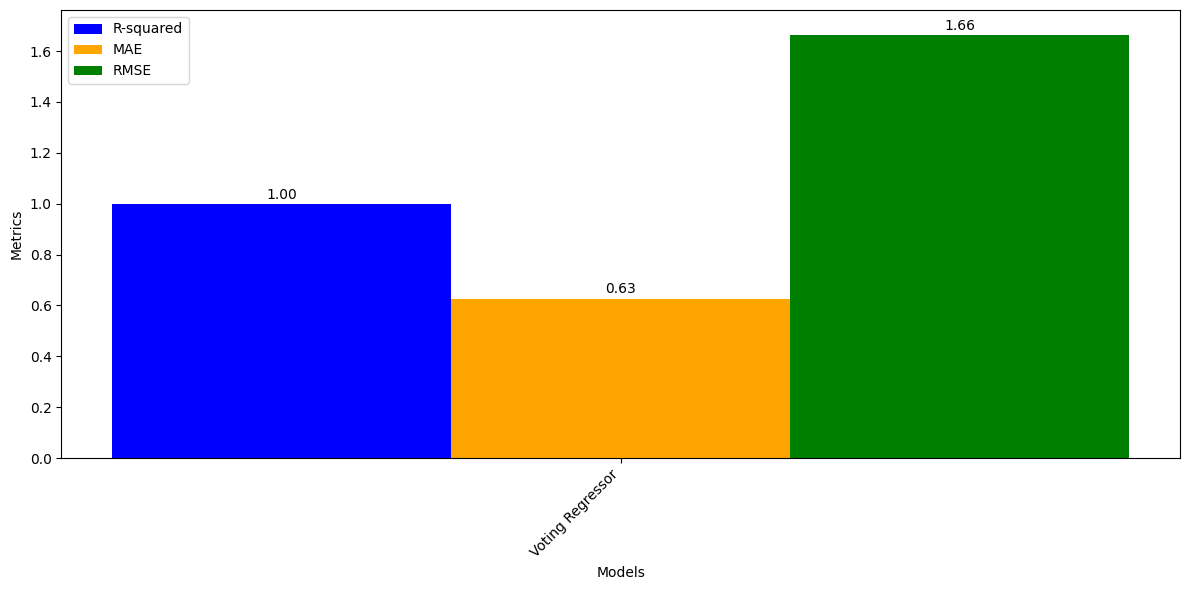

In [42]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/voting_model.pkl")
# Add other models as needed

# Create a dictionary for loaded models
loaded_models = {
    'Voting Regressor': tree_model,
    # Add other models as needed
}

# Evaluate and store metrics for each model
metrics = {'R-squared': [], 'MAE': [], 'RMSE': []}
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)

    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    metrics['R-squared'].append(r2)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot R-squared
plt.bar(np.arange(len(model_names)) - 0.2, metrics['R-squared'], width=0.2, label='R-squared', color='blue')
# Plot MAE
plt.bar(np.arange(len(model_names)), metrics['MAE'], width=0.2, label='MAE', color='orange')
# Plot RMSE
plt.bar(np.arange(len(model_names)) + 0.2, metrics['RMSE'], width=0.2, label='RMSE', color='green')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.ylim(0, max(max(metrics['R-squared']), max(metrics['MAE']), max(metrics['RMSE'])) + 0.1)
plt.xticks(np.arange(len(model_names)), model_names, rotation=45, ha='right')

# Add metric values on top of the bars
for i, model_name in enumerate(model_names):
    plt.text(i - 0.2, metrics['R-squared'][i] + 0.02, f'{metrics["R-squared"][i]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i, metrics['MAE'][i] + 0.02, f'{metrics["MAE"][i]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i + 0.2, metrics['RMSE'][i] + 0.02, f'{metrics["RMSE"][i]:.2f}', ha='center', color='black', fontsize=10)

plt.legend()
plt.tight_layout()

plt.show()


<ipython-input-43-37be8afffa6a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


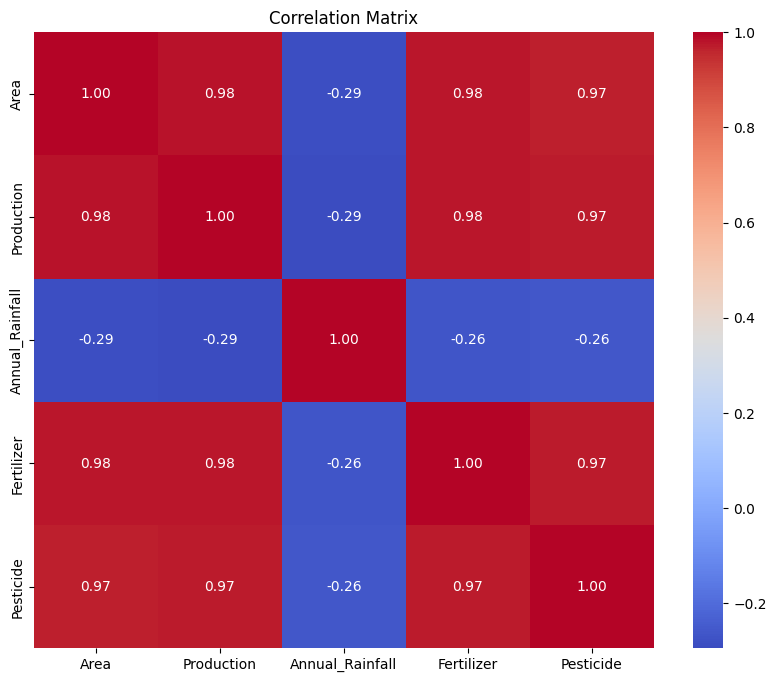

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame
correlation_matrix = X_train.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


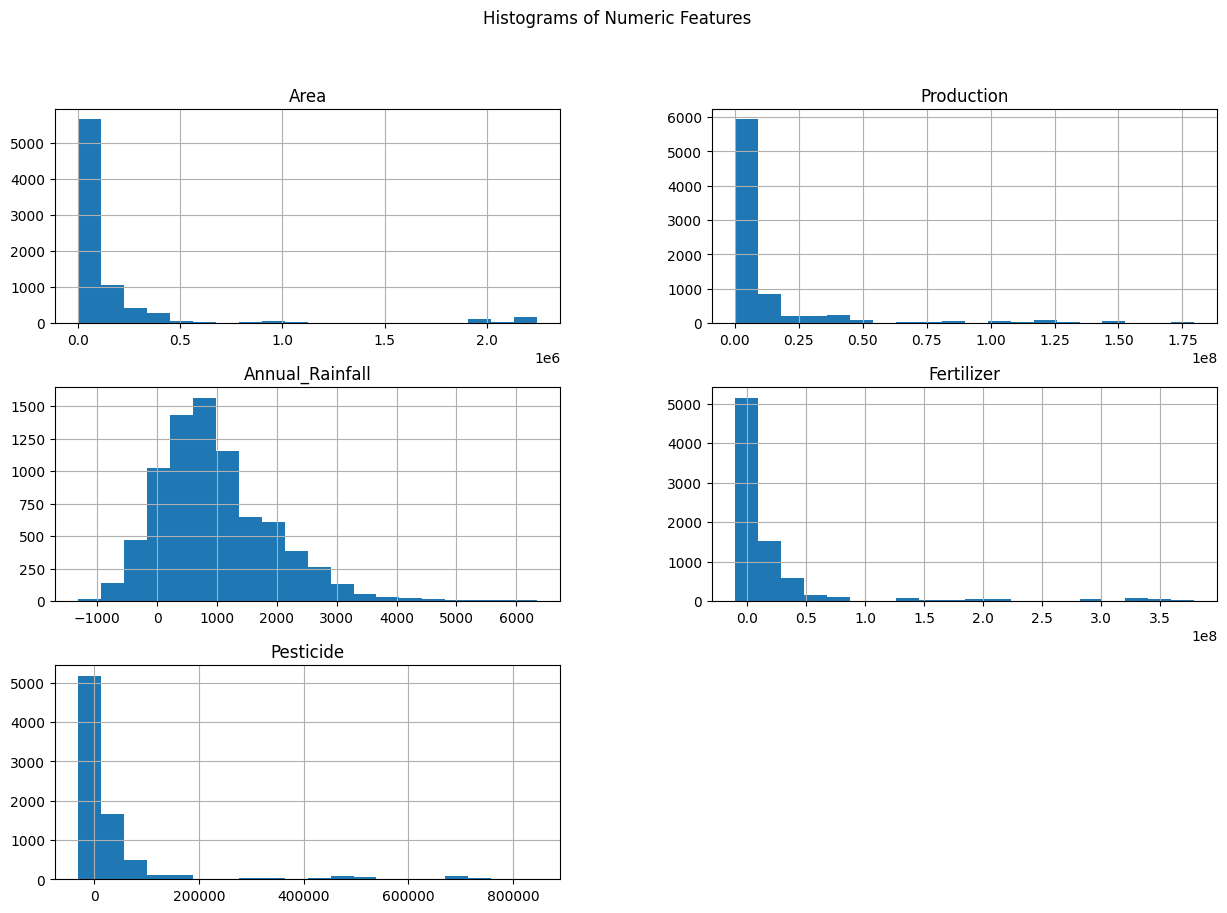

In [44]:
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()


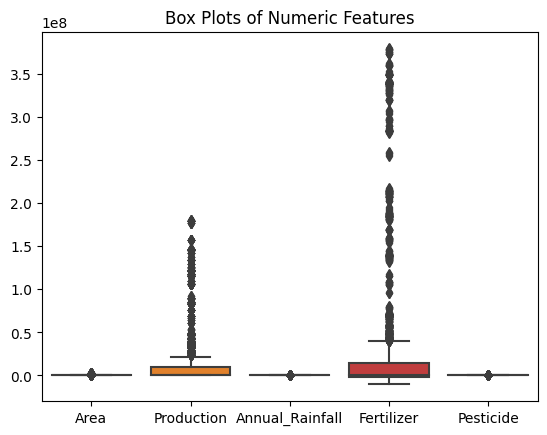

In [45]:
import seaborn as sns

sns.boxplot(data=X_train[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])
plt.title('Box Plots of Numeric Features')
plt.show()


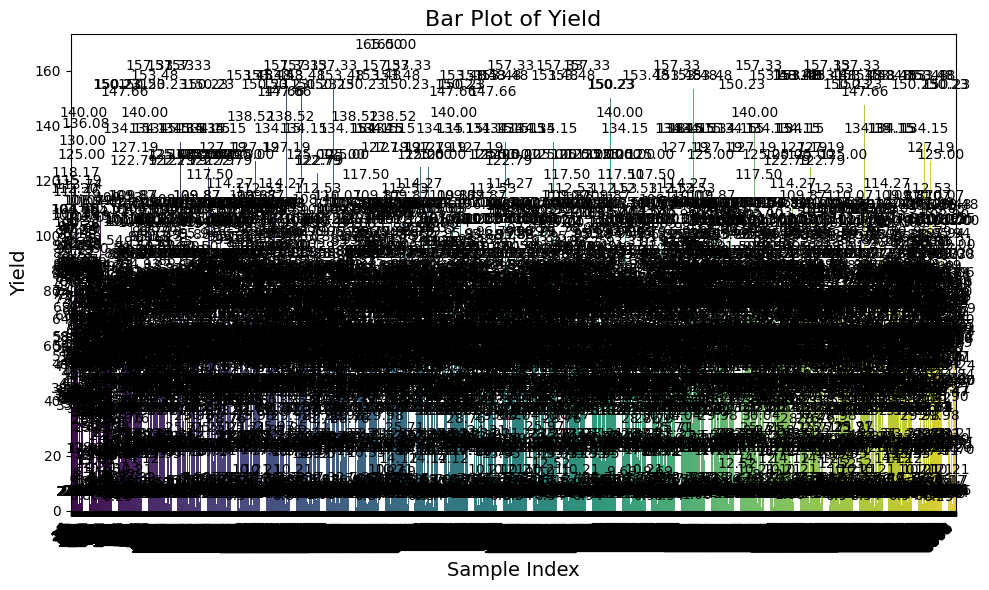

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a color palette
sns.set_palette("viridis")

# Create a bar plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=y_train.index, y=y_train, palette="viridis")

# Add labels and title
plt.title('Bar Plot of Yield', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Yield', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

# Show the plot
plt.tight_layout()
plt.show()


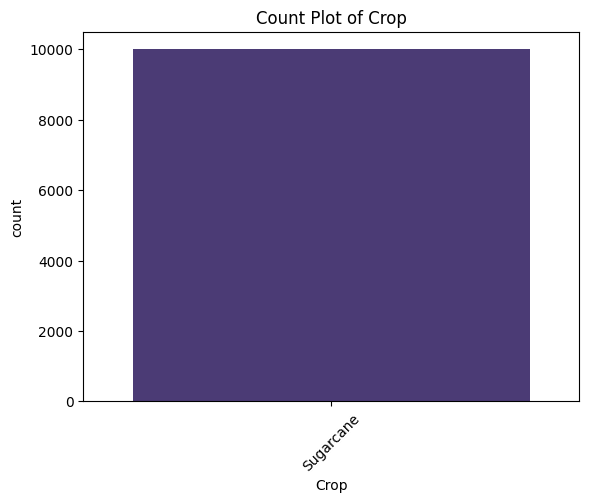

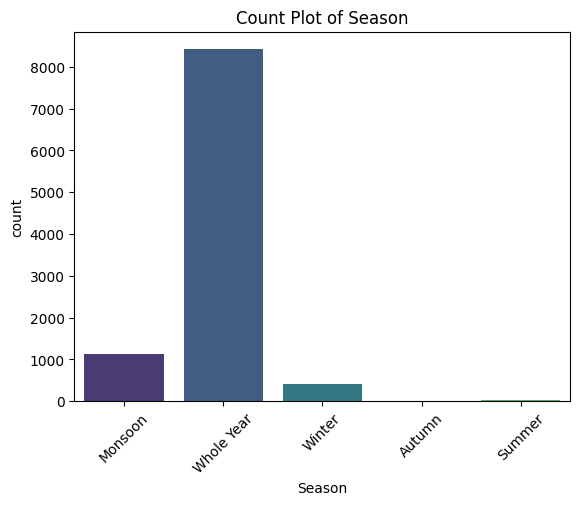

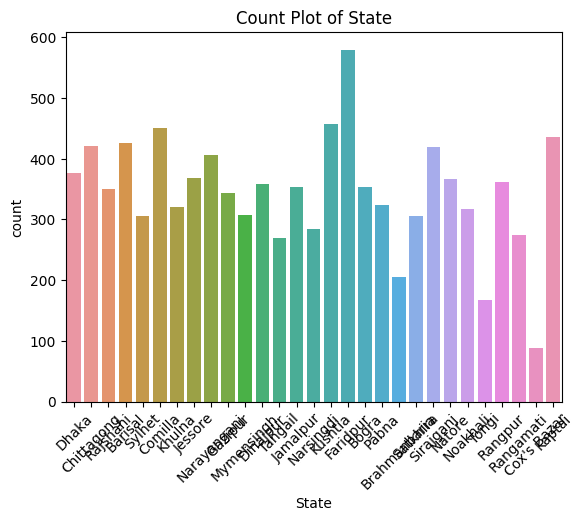

In [47]:
for column in ['Crop', 'Season', 'State']:
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Adjust the rotation angle as needed
    plt.show()


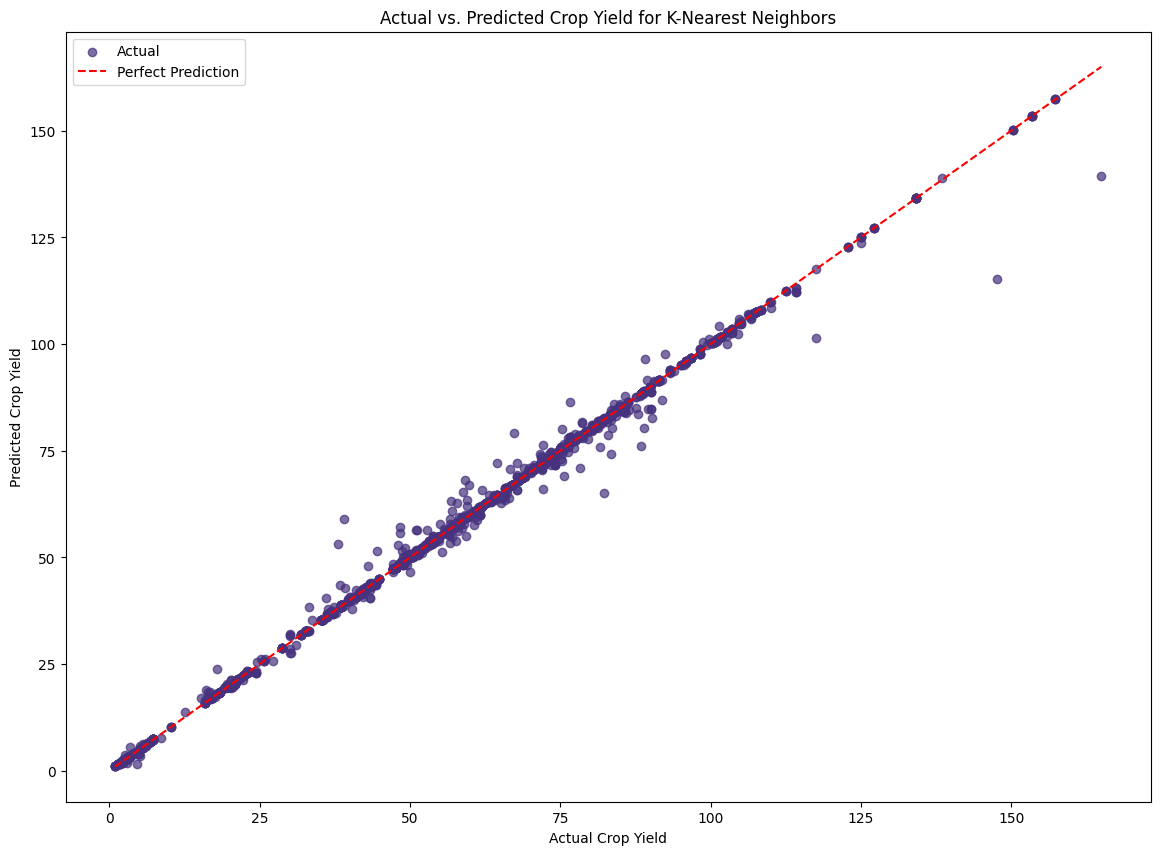

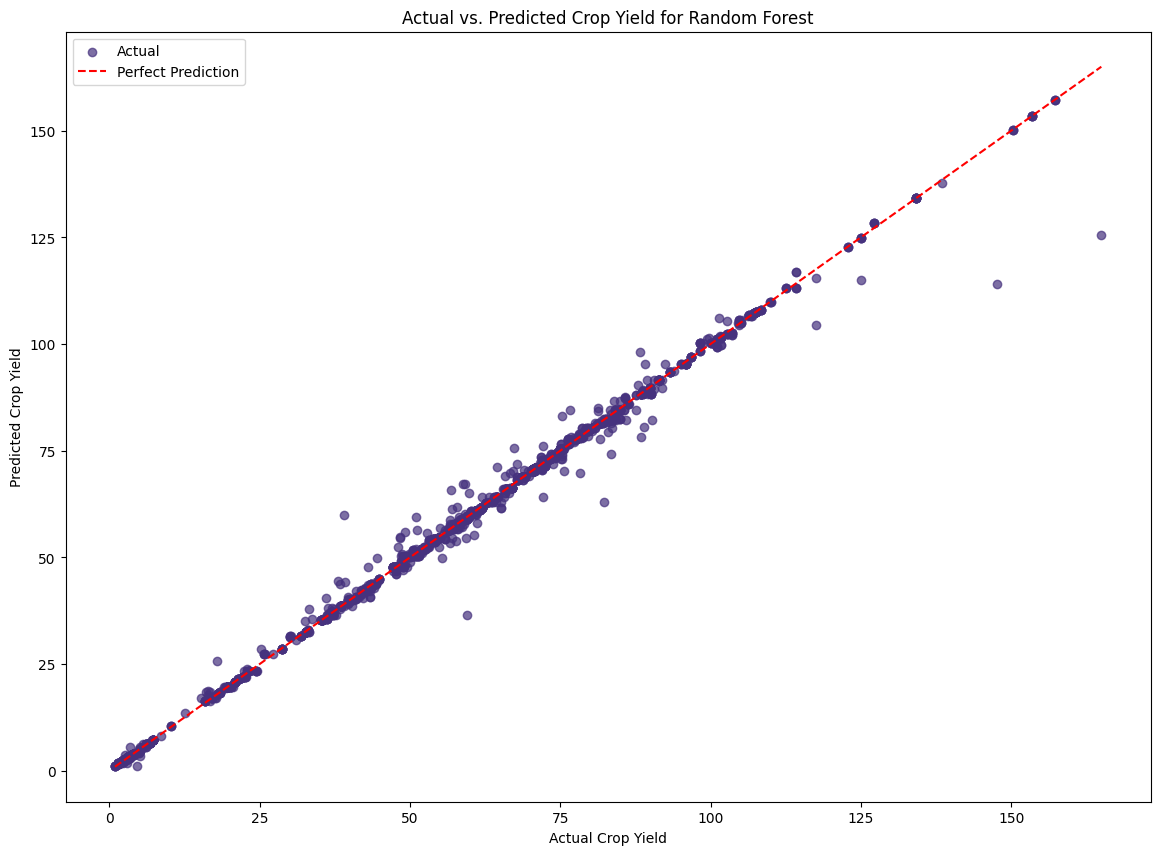

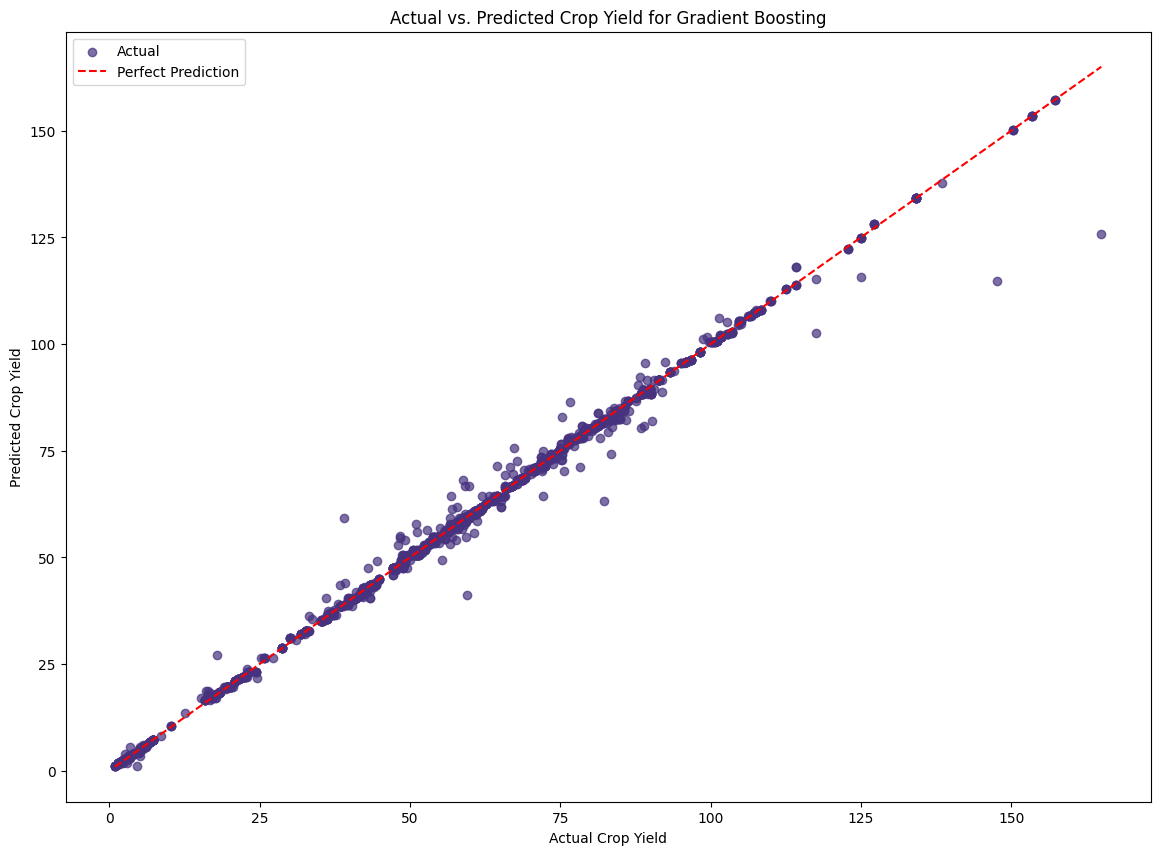

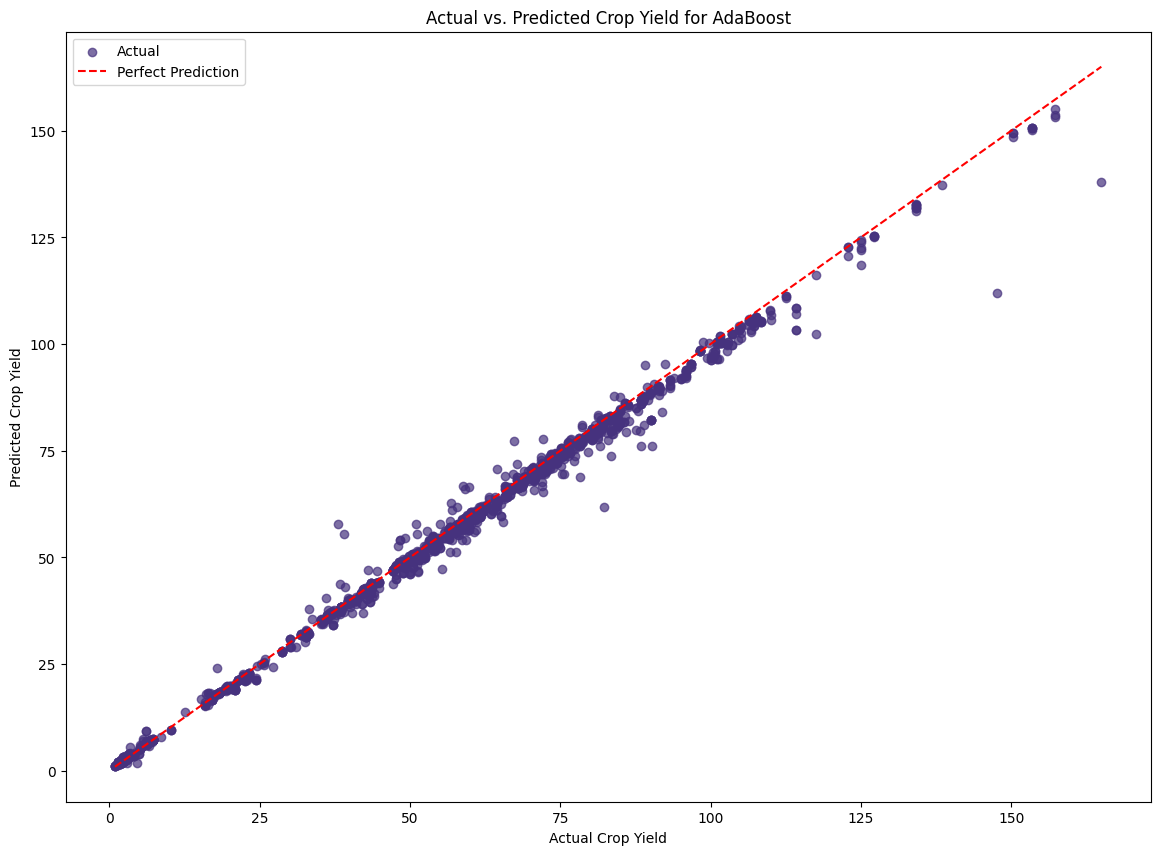

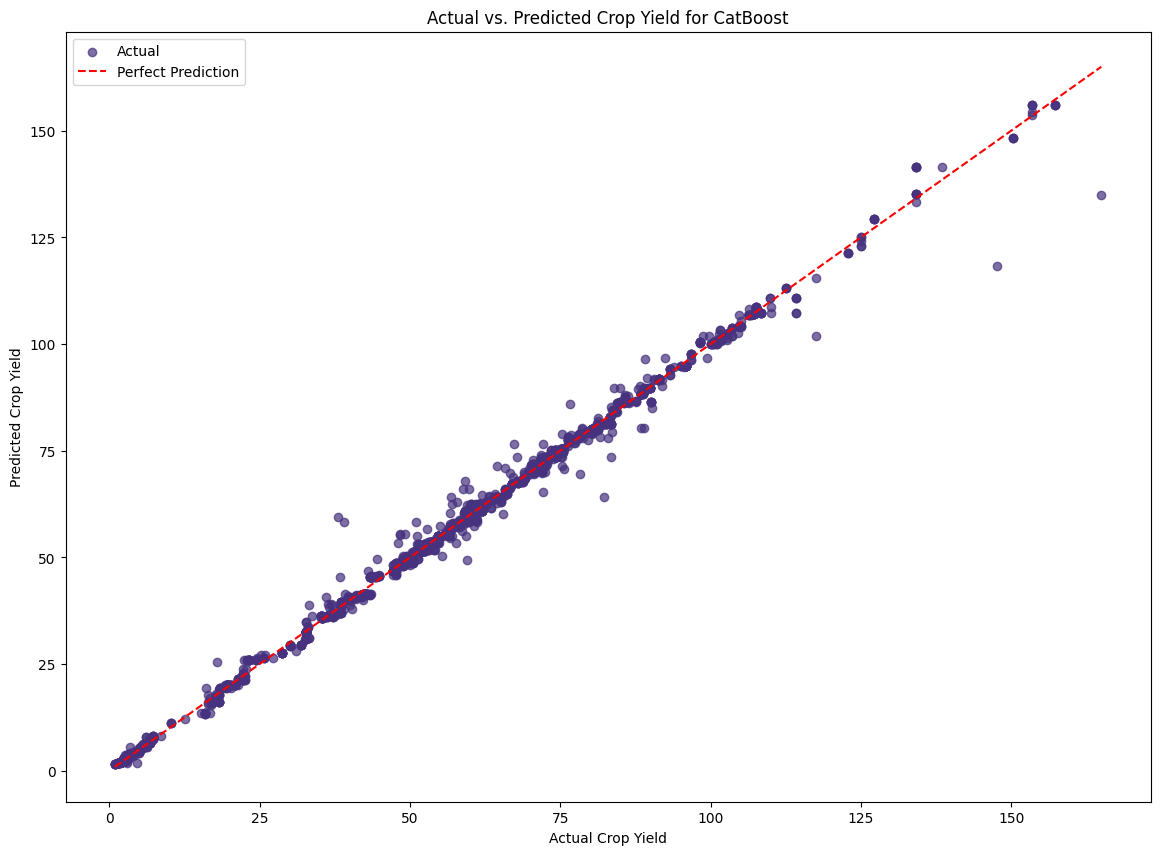

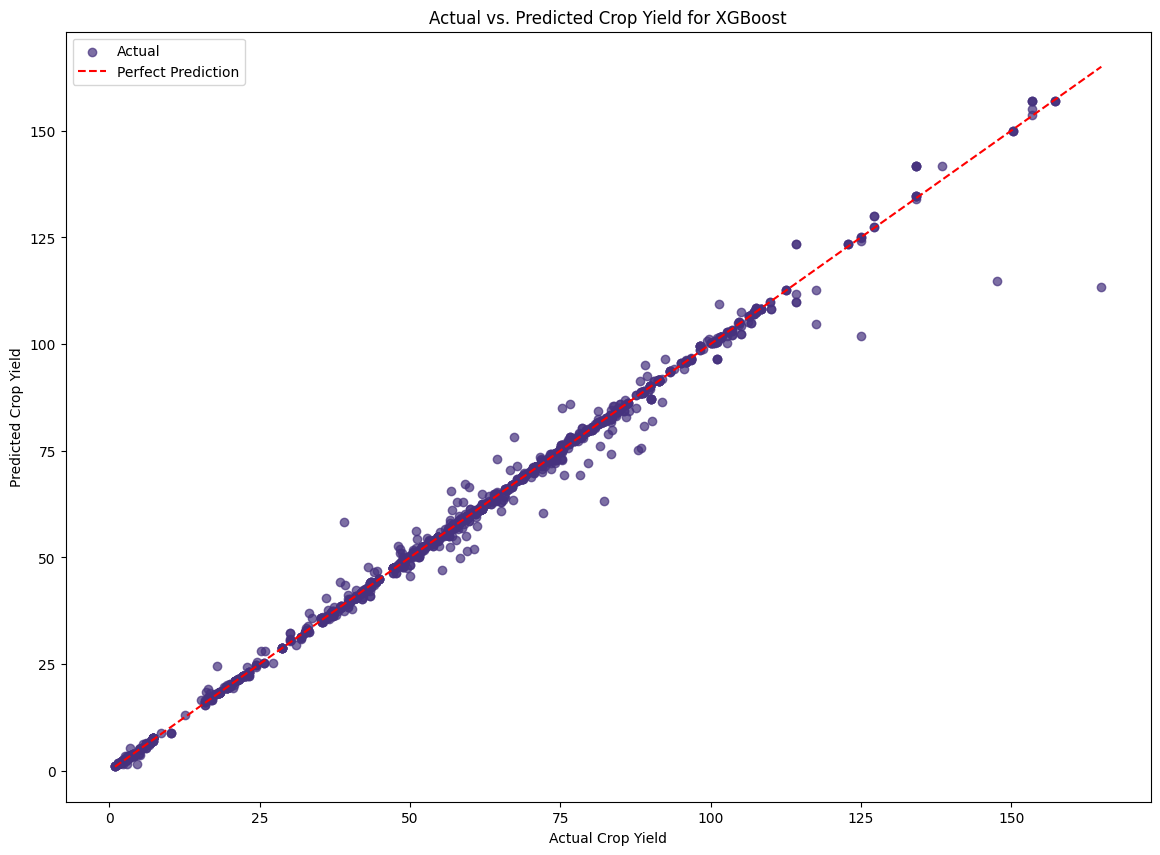

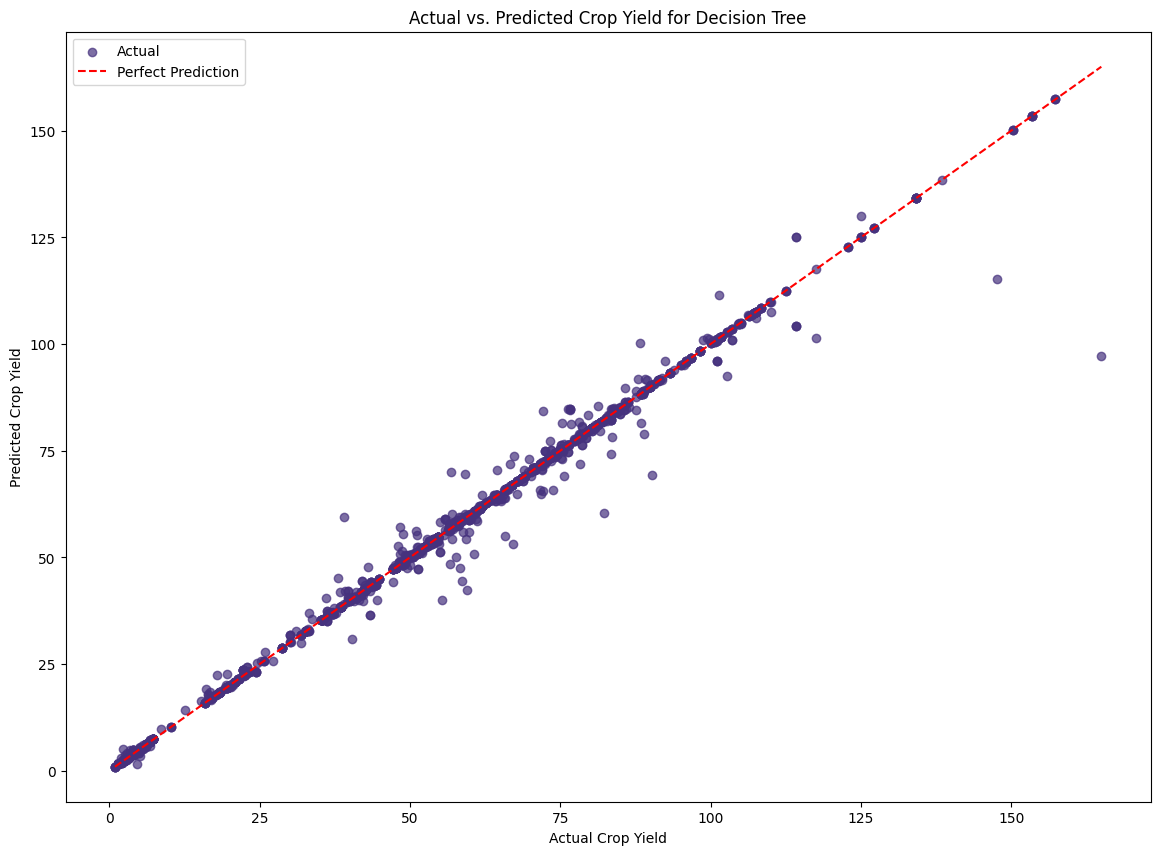

In [48]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/stacking_with_decision_tree_as_final_estimator_model.pkl")
knn_model = joblib.load("/content/stacking_with_knn_as_final_estimator_model.pkl")
rf_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
gb_model = joblib.load("/content/stacking_with_gradient_boosting_as_final_estimator_model.pkl")
ada_model = joblib.load("/content/stacking_with_adaboost_as_final_estimator_model.pkl")
cat_model = joblib.load("/content/stacking_with_catboost_as_final_estimator_model.pkl")
#linear_model = joblib.load("/content/svr_bagging_model.pkl")
#svm_model = joblib.load("/content/stacking_with_svr_as_final_estimator_model.pkl")
xgb_model = joblib.load("/content/stacking_with_xgboost_as_final_estimator_model.pkl")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())
predictions_dict = {}

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    predictions_dict[model_name] = {'actual': y_test, 'predicted': test_predictions}

# Scatter plot for actual vs. predicted for each model
for model_name, predictions in predictions_dict.items():
    plt.figure(figsize=(14, 10))
    plt.scatter(predictions['actual'], predictions['predicted'], label='Actual', alpha=0.7)
    plt.plot([min(predictions['actual']), max(predictions['actual'])], [min(predictions['actual']), max(predictions['actual'])], '--', color='red', label='Perfect Prediction')
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.title(f"Actual vs. Predicted Crop Yield for {model_name}")
    plt.legend()
    plt.show()


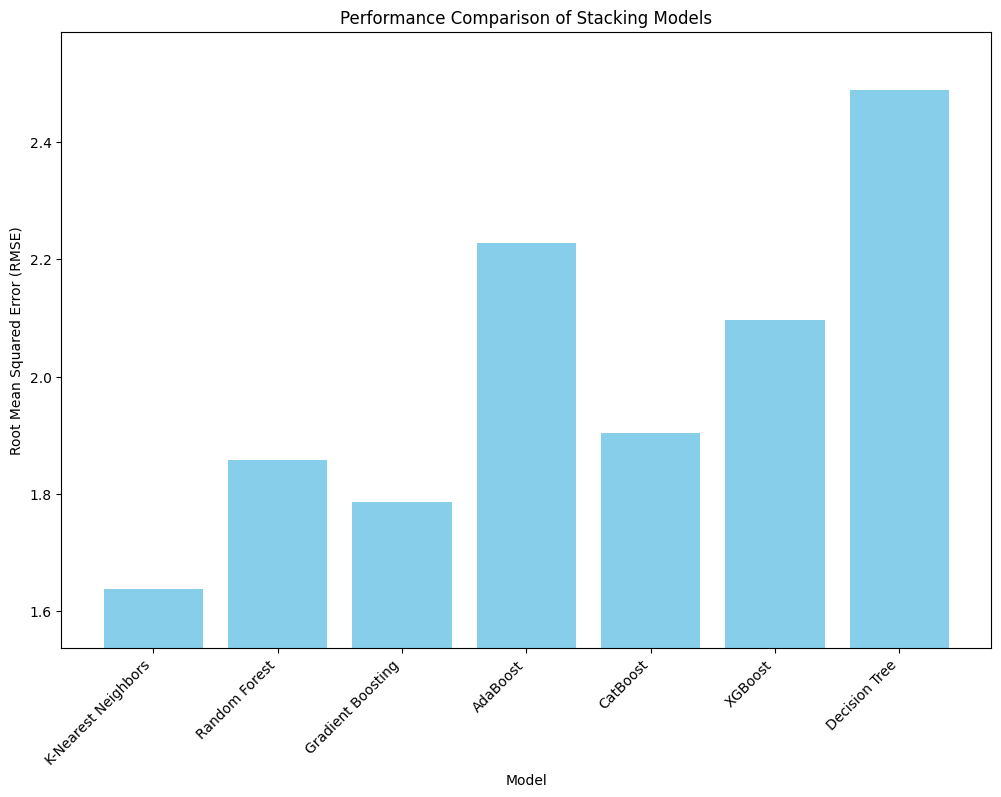

In [49]:
# Bar chart for RMSE scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Performance Comparison of Stacking Models')
plt.ylim([min(rmse_scores) - 0.1, max(rmse_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


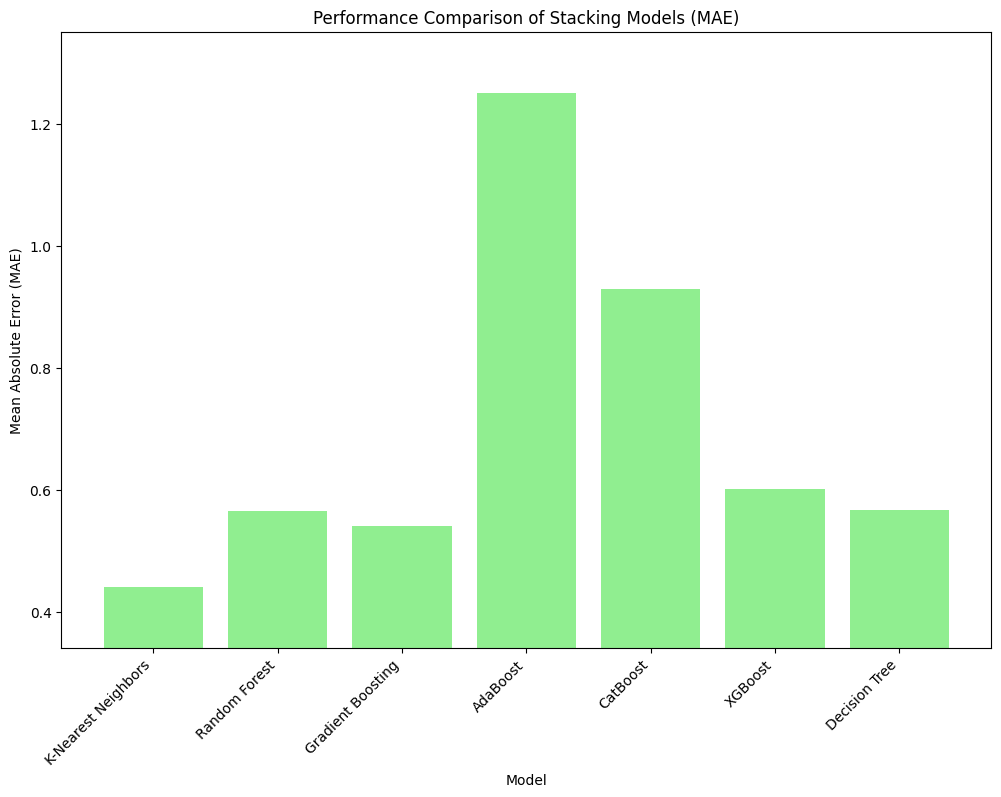

In [51]:
from sklearn.metrics import mean_absolute_error

# Evaluate and store MAE scores for each model
mae_scores = []

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mae = mean_absolute_error(y_test, test_predictions)
    mae_scores.append(mae)

# Bar chart for MAE scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, mae_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance Comparison of Stacking Models (MAE)')
plt.ylim([min(mae_scores) - 0.1, max(mae_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


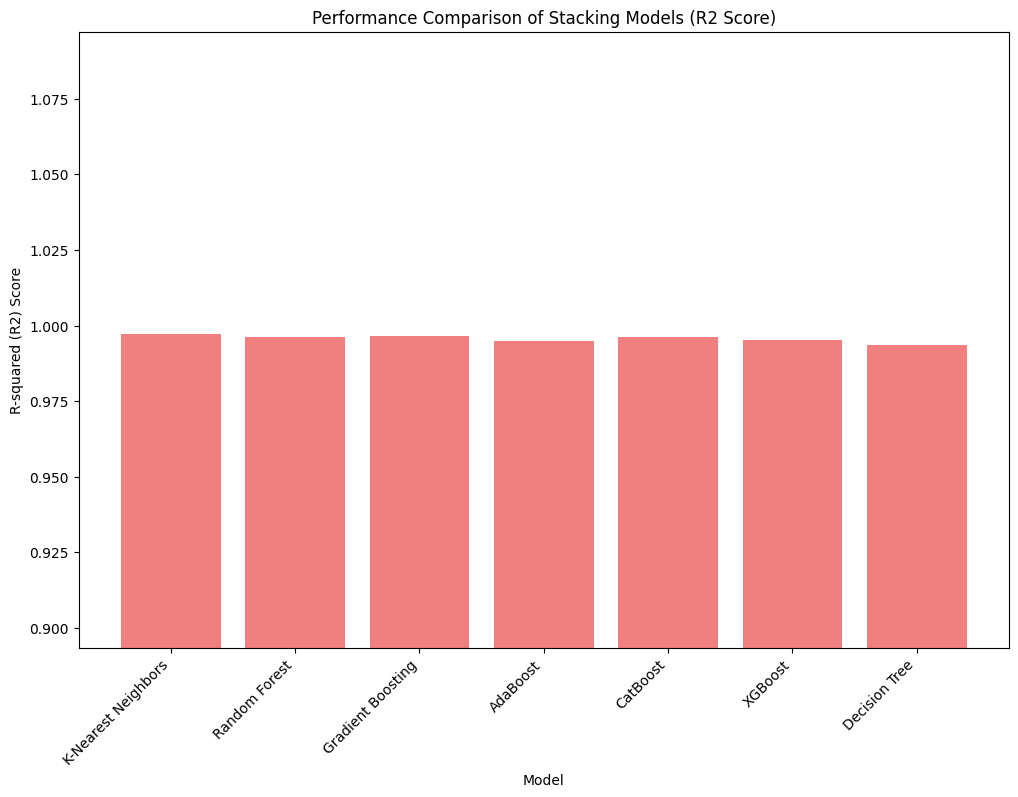

In [50]:
from sklearn.metrics import r2_score

# Evaluate and store R2 scores for each model
r2_scores = []

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    r2 = r2_score(y_test, test_predictions)
    r2_scores.append(r2)

# Bar chart for R2 scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, r2_scores, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('Performance Comparison of Stacking Models (R2 Score)')
plt.ylim([min(r2_scores) - 0.1, max(r2_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Specify the path to your original CSV file
csv_file_path = '/content/sugarcane.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Drop the 'Crop_Year' column
df = df.drop(columns=['Crop_Year'])

# Subtract specific values from columns before creating new rows


# Get the number of rows you want to create
target_rows = 10000

# Duplicate rows randomly to reach the target number of rows
while len(df) < target_rows:
    # Randomly choose an index from the existing rows
    random_index = np.random.choice(len(df))

    # Select the row at the random index
    random_row = df.iloc[random_index].copy()

    # Modify the 'Yield' column by dividing the value by areas
    random_row['Annual_Rainfall'] -= 200
    random_row['Fertilizer'] -= 1000000  # Subtract 10 lakhs
    random_row['Pesticide'] -= 3000
    random_row['Yield'] = random_row['Production'] / random_row['Area']

    # Append the modified row to the DataFrame
    df = df.append(random_row, ignore_index=True)

# Save the updated DataFrame to a new CSV file
output_csv_path = '/content/sugarcane_updated10k.csv'
df.to_csv(output_csv_path, index=False)

# Display the updated DataFrame
print(df)

<ipython-input-24-62ec57014a99>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(random_row, ignore_index=True)


           Crop      Season       State      Area  Production  \
0     Sugarcane     Monsoon       Dhaka   31318.0     1287451   
1     Sugarcane  Whole Year  Chittagong  308857.0    28999269   
2     Sugarcane  Whole Year    Rajshahi      82.0         225   
3     Sugarcane  Whole Year     Barisal   25797.0     1818700   
4     Sugarcane     Monsoon      Sylhet    2710.0      232369   
...         ...         ...         ...       ...         ...   
9995  Sugarcane  Whole Year       Bogra   41925.0     1794420   
9996  Sugarcane  Whole Year    Noakhali       3.0         276   
9997  Sugarcane  Whole Year     Comilla    1021.0       49253   
9998  Sugarcane  Whole Year     Barisal   17557.0     1638267   
9999  Sugarcane  Whole Year   Sirajganj    7540.0       18456   

      Annual_Rainfall   Fertilizer  Pesticide      Yield  
0           2051.4000   2980534.06    9708.58  41.896957  
1           1266.7000  29393920.69   95745.67  91.747368  
2           3818.2000      7803.94      25